### Part 2 

Throughput performance
Write a script that:  
- (i) generates a random graph describing
the topology of the ToR switch network; 
- (ii) checks its
connectivity; 
- (iii) finds shortest path routes; (iv) estimates
h
.

Use both the
r
-regular random graph model and the
p
-Erd ̋os-R ́enyi random graph model.  In either case let
n
be the
number of nodes (you can assume 9
≤
n
≤
100,
r
= 8 and
p
= 8
/
(
n
−
1))

Plot the application-oblivious throughput bound
TH
, as
defined above, versus
n
for the two graph models.

c:\users\sp\appdata\local\programs\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
c:\users\sp\appdata\local\programs\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
c:\users\sp\appdata\local\programs\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
c:\users\sp\appdata\local\programs\python\python36-32\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated

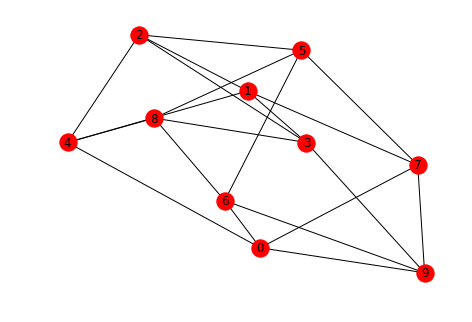

In [216]:
#(i)  Like a regular graph/jellyfish/A regular graph is simply one where each node has the same degree.
#And a graph in Jellyfish is one where the switches in the topology are the nodes.

import networkx as nx
import matplotlib.pyplot as plt
   
switches = 10
degree = 4
jelly = nx.random_regular_graph(d=degree, n=switches)
A_jelly = nx.to_numpy_matrix(jelly)


nx.draw(jelly,with_labels = True)
plt.show()    



In [206]:
#PART 2 (i)

def con(switches,degree):
    graph=nx.Graph()
    c=nx.path_graph(switches)
    graph.add_nodes_from(c)
    #node1 = np.random.choice(graph.nodes())  
    #node2 = np.random.choice(graph.nodes())
    matrix = nx.to_numpy_matrix(graph)
    print(matrix)
    while np.sum(matrix) < degree * switches :
        node1 = np.random.choice(graph.nodes())  
        node2 = np.random.choice(graph.nodes())
        while graph.has_edge(node1,node2) or node1==node2 :
            node1 = np.random.choice(graph.nodes())
            node2 = np.random.choice(graph.nodes())   
        if graph.degree(node1) < degree and graph.degree(node2)< degree:
            graph.add_edge(node1,node2)
            matrix = nx.to_numpy_matrix(graph)
    return (matrix)   

#con(10,2)
con(8,3)
#con(6,2)
    

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


KeyboardInterrupt: 

In [148]:
#A_jelly = np.array(A_jelly)
np.any((np.sum (A_jelly,axis = 1))<2, axis=1)

matrix([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [50]:
#(ii)
#Identify the shortest path between two (existing) nodes with the Dijkstra's algorithm

def dijkstra(graph, start, end):
    # Check whether the two nodes are in the graph
    # Keep the checks separated so that we know which one we have to modify
    if start not in graph.nodes():
        return("The start node is not in the graph.")
    if end not in graph.nodes():
        return("The end node is not in the graph.")
    
    # Check whether there is no path between the start and end nodes:
    # if end is in the nodes of the subgraph induced by start 
    if end not in nx.node_connected_component(graph, start):
        return("There is no path between the start and end nodes.")
    
    # heapq object, list of tuples with (node)
    q = [(start, [])]
    # set of unseen nodes
    seen = set()
    while q:
        # node of the closest node (closest to the previously seen node)
        current, path = heapq.heappop(q)
        if current not in seen:
            # update the seen set
            seen.add(current)
            # update the path
            path = path + [current]
            # return if found
            if current == end:
                return (path)
            # all current neighbors
            temp = graph[current]
            # all unseen (not-visited) neighbors of current
            to_see = list(set(temp).difference(seen))
            # list of tuples with the new nodes
            # where node is one of the unseen neighbors 
            neigh = [n for n in to_see]
            # add the new info ()
            for n in neigh:
                heapq.heappush(q, (n, path))

                
dijkstra(jelly,1,8)

[1, 4, 8]

 Traffic Model and Throughput 

In [227]:
#(iii)
#Estimate the mean path length hbar/unweighted graph

def mean_path(graph):
    avg=0
    n=len(graph)
    for node in graph:
        path_length=nx.single_source_shortest_path_length(graph, node)
        avg += sum(path_length.values())
    return avg/(n*(n-1))

mean_path(jelly)

1.5777777777777777

Reliability performance

Assume a link can break down (fail) with probability
q
.

Plot
TH
as a function of
q
for 0
<
q
≤
0
.
25, for the two
network models in point 1) above with
n
= 100.